In [ ]:
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

import numpy as np
import seaborn as sns

1. Припустимо, що у вас є багатошаровий перцептрон, що складається з одного вхідного
шару з 15 нейронами, за яким є ще один прихований шар з 35 нейронами і один
вихідний шар з 5 нейронами. Всі штучні нейрони застосовують функцію активації
ReLU.

In [ ]:
hidden_layer = Dense(35, activation='relu', input_shape=(15,))
output_layer = Dense(5, activation='relu')


model = Sequential(
    [
     hidden_layer,
     output_layer
    ]
)

Яка форма вхідної матриці X?

In [ ]:
model.input_shape

(None, 15)

Що можна сказати про форму вектора ваг $W_h$ прихованого шару?

In [ ]:
weights, bias = hidden_layer.get_weights()
weights.shape

(15, 35)

... і формі його вектора зсувів $b_h$?

In [ ]:
bias.shape

(35,)

Яка форма вектора ваг $W_0$ вихідного шару?

In [ ]:
weights, bias = output_layer.get_weights()
weights.shape

(35, 5)

... і форма його вектора зсувів $b_0$?  

In [ ]:
bias.shape

(5,)

Яка форма вихідної матриці Y мережі?

In [ ]:
model.output_shape

(None, 5)

Напишіть рівняння, яке обчислює вихідну матрицю Y.   
$Y = ReLU(ReLU(XW_h + b_h)W_0 + b_0)$

2. Порівняйте точність класифікації нейронної мережі з різними нелінійними функціями
активації з точністю класифікації нейронної мережі з лінійною функцією активації.

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

In [ ]:
input_size = np.prod(X_train.shape[1:])
(n_classes,) = np.unique(y_train).shape

In [ ]:
X_train = X_train.reshape(-1, input_size) / 255 - 0.5
X_val = X_val.reshape(-1, input_size) / 255 - 0.5

In [ ]:
def create_classifier(input_size, hidden_sizes, n_classes, activations=None):
  model = Sequential()
  model.add(Input(shape=(input_size,)))

  if not activations:
    activations = ['linear'] * len(hidden_sizes)
  elif isinstance(activations, str):
    activations = [activations] * len(hidden_sizes)

  for size, activation in zip(hidden_sizes, activations):
    model.add(Dense(size, activation))

  model.add(Dense(n_classes, activation='softmax'))

  return model


def train_classifier(classifier, train, val, epochs=5):
  classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  classifier.fit(*train, epochs=epochs, validation_data=val)

Лінійна функція активації:

In [ ]:
train_classifier(create_classifier(input_size, [128, 32], n_classes), (X_train, y_train), (X_val, y_val))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5370 - accuracy: 0.8096 - val_loss: 0.4997 - val_accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4673 - accuracy: 0.8342 - val_loss: 0.4897 - val_accuracy: 0.8233
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4536 - accuracy: 0.8420 - val_loss: 0.4747 - val_accuracy: 0.8302
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4417 - accuracy: 0.8466 - val_loss: 0.4906 - val_accuracy: 0.8239
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4315 - accuracy: 0.8494 - val_loss: 0.4981 - val_accuracy: 0.8212


ReLU:

In [ ]:
train_classifier(create_classifier(input_size, [128, 32], n_classes, 'relu'), (X_train, y_train), (X_val, y_val))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4937 - accuracy: 0.8203 - val_loss: 0.4343 - val_accuracy: 0.8422
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3778 - accuracy: 0.8613 - val_loss: 0.4099 - val_accuracy: 0.8534
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3397 - accuracy: 0.8743 - val_loss: 0.3831 - val_accuracy: 0.8602
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3173 - accuracy: 0.8821 - val_loss: 0.3711 - val_accuracy: 0.8692
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2968 - accuracy: 0.8901 - val_loss: 0.3844 - val_accuracy: 0.8627


Значної різниці немає, але з функцією активації результат кращий

Створимо дані з нелінійною залежністю

In [ ]:
X = (np.random.rand(5000, 10) - 0.5) * 10

In [ ]:
y_temp = (np.sin(X) + np.power(X, 2)).sum(axis=1)

In [ ]:
y = np.zeros(y_temp.shape)
y[y_temp > np.quantile(y_temp, 0.25)] = 1
y[y_temp > np.quantile(y_temp, 0.5)] = 2
y[y_temp > np.quantile(y_temp, 0.75)] = 3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
input_size = np.prod(X_train.shape[1:])
(n_classes,) = np.unique(y_train).shape

In [ ]:
train_classifier(create_classifier(input_size, [128, 32], n_classes), (X_train, y_train), (X_val, y_val), epochs=15)

Epoch 1/15
118/118 [==============================] - 1s 3ms/step - loss: 1.4673 - accuracy: 0.2493 - val_loss: 1.4515 - val_accuracy: 0.2552
Epoch 2/15
118/118 [==============================] - 0s 3ms/step - loss: 1.4385 - accuracy: 0.2563 - val_loss: 1.4420 - val_accuracy: 0.2672
Epoch 3/15
118/118 [==============================] - 0s 2ms/step - loss: 1.4318 - accuracy: 0.2541 - val_loss: 1.4394 - val_accuracy: 0.2520
Epoch 4/15
118/118 [==============================] - 0s 3ms/step - loss: 1.4270 - accuracy: 0.2640 - val_loss: 1.4250 - val_accuracy: 0.2664
Epoch 5/15
118/118 [==============================] - 0s 2ms/step - loss: 1.4361 - accuracy: 0.2512 - val_loss: 1.4375 - val_accuracy: 0.2616
Epoch 6/15
118/118 [==============================] - 0s 3ms/step - loss: 1.4245 - accuracy: 0.2515 - val_loss: 1.4280 - val_accuracy: 0.2432
Epoch 7/15
118/118 [==============================] - 0s 2ms/step - loss: 1.4288 - accuracy: 0.2491 - val_loss: 1.4243 - val_accuracy: 0.2480
Epoch 

In [ ]:
train_classifier(create_classifier(input_size, [128, 32], n_classes, ['elu', 'selu']), (X_train, y_train), (X_val, y_val), epochs=15)

Epoch 1/15
118/118 [==============================] - 1s 4ms/step - loss: 1.4404 - accuracy: 0.2957 - val_loss: 1.3467 - val_accuracy: 0.3312
Epoch 2/15
118/118 [==============================] - 0s 3ms/step - loss: 1.2528 - accuracy: 0.4115 - val_loss: 1.1990 - val_accuracy: 0.4752
Epoch 3/15
118/118 [==============================] - 0s 2ms/step - loss: 1.1030 - accuracy: 0.5371 - val_loss: 1.0719 - val_accuracy: 0.5312
Epoch 4/15
118/118 [==============================] - 0s 3ms/step - loss: 0.9519 - accuracy: 0.6123 - val_loss: 0.9031 - val_accuracy: 0.6288
Epoch 5/15
118/118 [==============================] - 0s 2ms/step - loss: 0.8111 - accuracy: 0.6856 - val_loss: 0.7853 - val_accuracy: 0.6936
Epoch 6/15
118/118 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.7323 - val_loss: 0.6845 - val_accuracy: 0.7248
Epoch 7/15
118/118 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7848 - val_loss: 0.6251 - val_accuracy: 0.7384
Epoch 

Якщо існує нелінійна залежність, то нейромережа з лінійною функцією активації нездатна її вловити. В таких випадках мережі з нелінійними функціями активації можуть показати значно кращі результати

3. Для двошарової нейронної мережі з фіксованою функцією активації
a $\alpha (x)$
побудуйте
графік залежності часу навчання нейронної мережі і точності класифікації від
кількості нейронів в прихованому шарі мережі.

In [ ]:
import time
from keras import backend


def alpha1(x):
  return backend.maximum(backend.sign(x), 0))


def create_alpha1_classifier(input_size, hidden_size):
  return Sequential(
      [
       Dense(hidden_size, activation=alpha1, input_shape=(input_size,)), 
       Dense(1, activation='sigmoid')
      ]
    )
  

def train_binary_classifier(classifier, train, test, epochs=5):
  """Returns accuracy ([0, 1]) and training time (seconds)"""

  classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  training_start = time.perf_counter()

  classifier.fit(*train, epochs=epochs, verbose=0)

  training_time = time.perf_counter() - training_start

  return classifier.evaluate(*test, return_dict=True, verbose=0)['accuracy'], training_time

In [ ]:
input_size = 200
n_classes = 2

X = (np.random.rand(5000, input_size) - 0.5) * 10
y = (X.sum(axis=1) > 0).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
hidden_size_list = [16, 32, 64, 128, 256, 512]
accuracy_list, time_list = [], []

for hidden_size in hidden_size_list:
  accuracy, training_time = train_binary_classifier(create_alpha1_classifier(input_size, hidden_size), (X_train, y_train), (X_test, y_test), epochs=20)
  accuracy_list.append(accuracy)
  time_list.append(training_time)


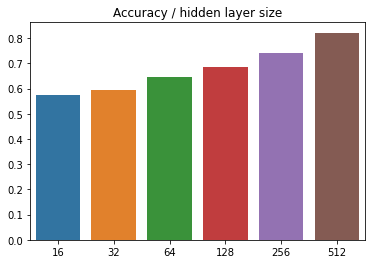

In [ ]:
_ = sns.barplot(x=hidden_size_list, y=accuracy_list).set_title('Accuracy / hidden layer size')

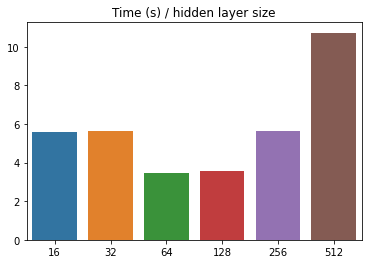

In [ ]:
_ = sns.barplot(x=hidden_size_list, y=time_list).set_title('Time (s) / hidden layer size')

4. Побудуйте графік залежності часу навчання нейронної мережі і точності класифікації
від кількості прихованих шарів (всі приховані шари однакового розміру) для
багатошарової нейронної мережі з фіксованою функцією активації
$\alpha (x)$.

In [ ]:
def alpha2(x):
  return backend.log(1 + backend.exp(x))


def create_alpha2_classifier(input_size, hidden_layers_num, hidden_size=64):
  model = Sequential()
  model.add(Input(shape=(input_size,)))
  
  for _ in range(hidden_layers_num):
    model.add(Dense(hidden_size, activation=alpha2))

  model.add(Dense(1, activation='sigmoid'))

  return model

In [ ]:
hidden_layers_num_list = list(range(1, 6))
accuracy_list, time_list = [], []

for hidden_layers_num in hidden_layers_num_list:
  accuracy, training_time = train_binary_classifier(create_alpha2_classifier(input_size, hidden_layers_num), (X_train, y_train), (X_test, y_test), epochs=20)
  accuracy_list.append(accuracy)
  time_list.append(training_time)

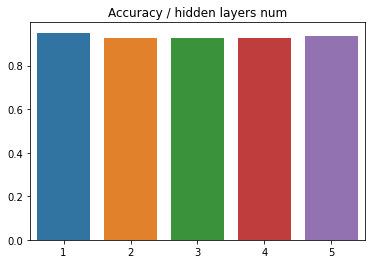

In [ ]:
_ = sns.barplot(x=hidden_layers_num_list, y=accuracy_list).set_title('Accuracy / hidden layers num')

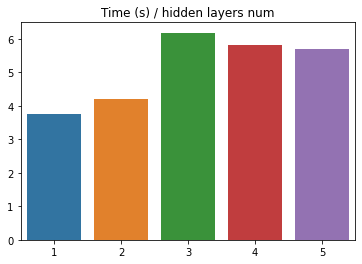

In [ ]:
_ = sns.barplot(x=hidden_layers_num_list, y=time_list).set_title('Time (s) / hidden layers num')